<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm



from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

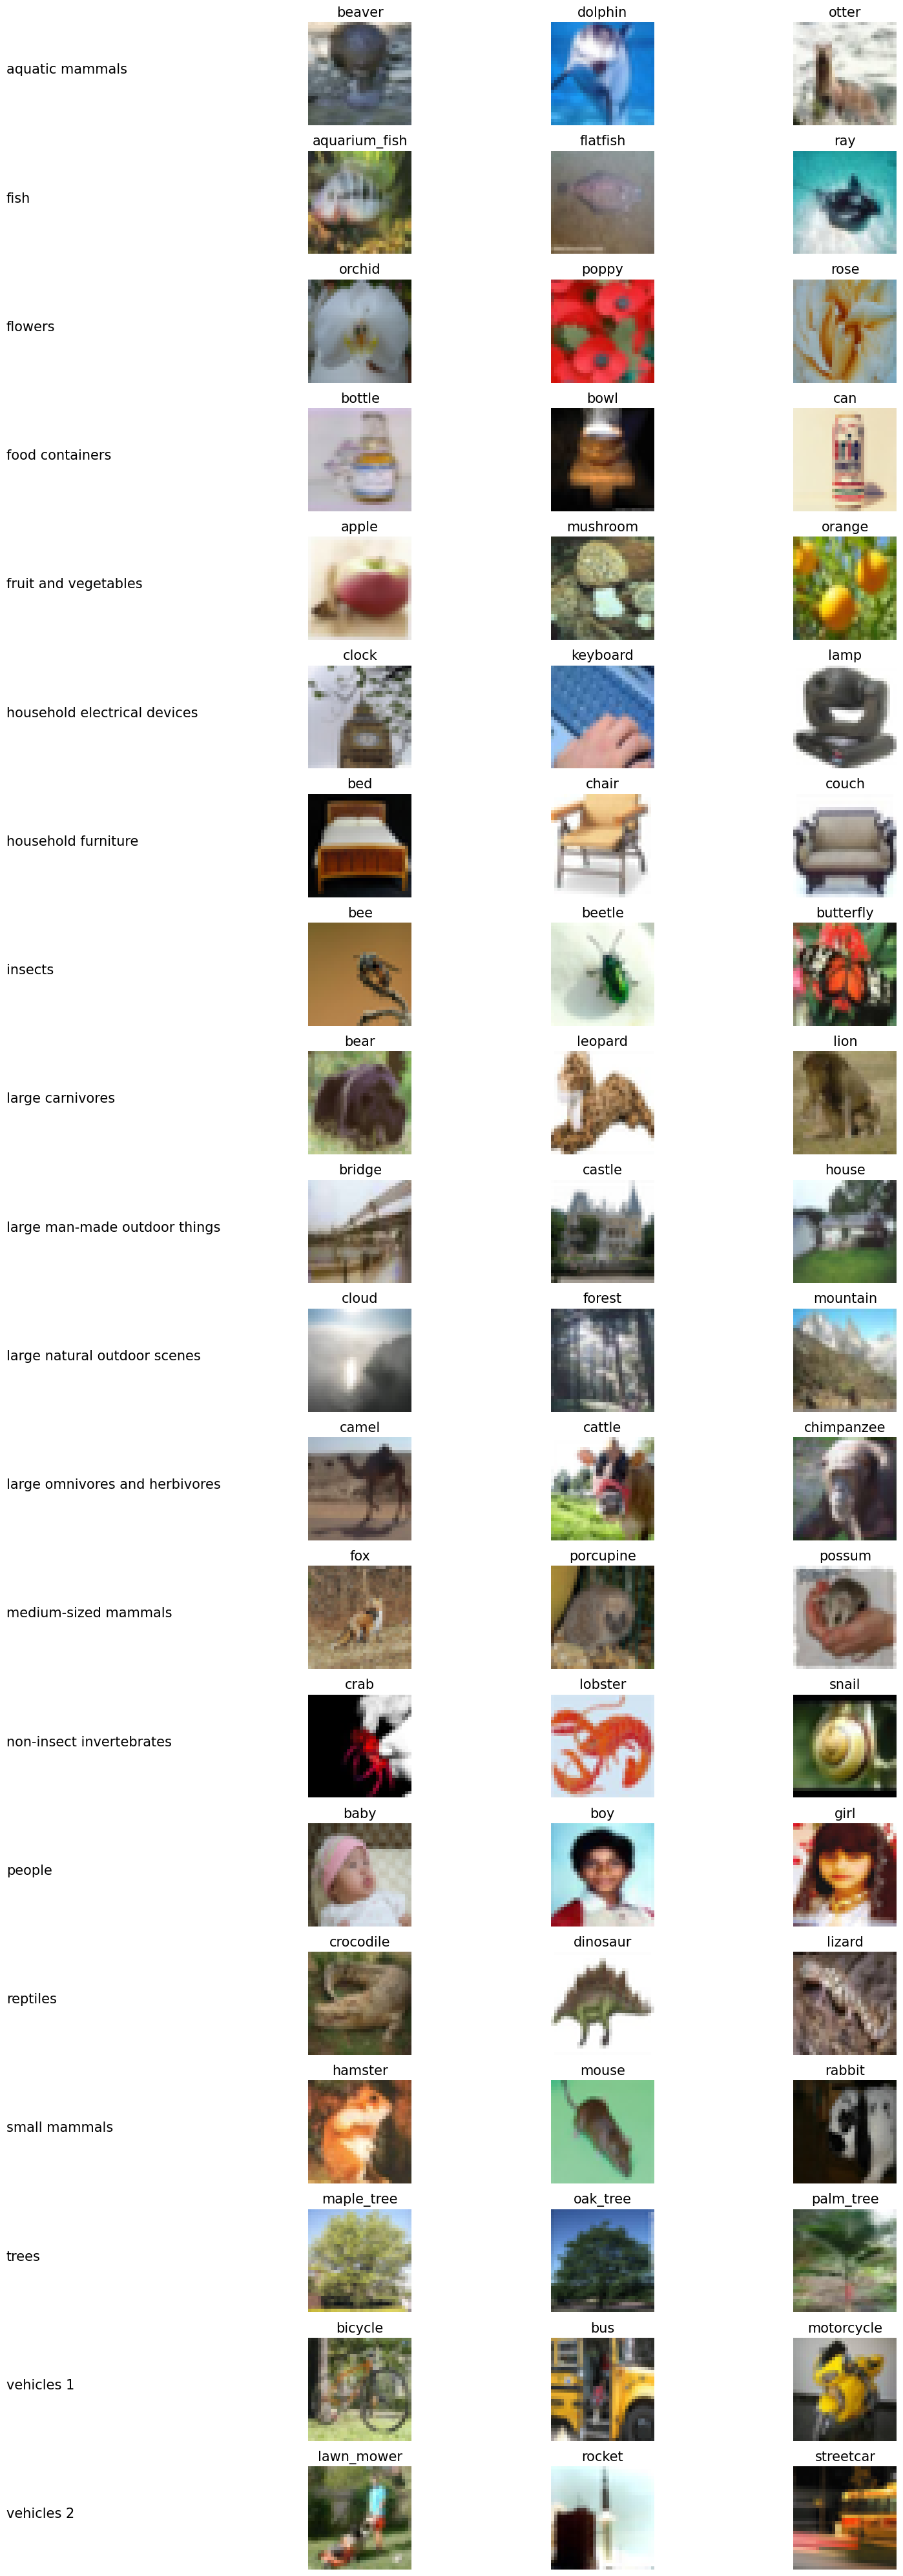

In [97]:
def visualize_cifar100_superclasses(train_set, superclasses):
    data, labels = train_set.data, train_set.targets
    fig, ax = plt.subplots(len(superclasses), 3 + 1, figsize=(15, 2 * len(superclasses)))

    for i, (superclass, subclasses) in enumerate(superclasses.items()):
        ax[i, 0].text(0.0, 0.5, superclass, fontsize=15)
        ax[i, 0].axis('off')

        for j, subclass in enumerate(subclasses[:3]):
            name = classes.index(subclass)
            image = np.where(np.array(labels) == name)[0][0]
            ax[i, j + 1].imshow(data[image])
            ax[i, j + 1].set_title(subclass, fontsize=15)
            ax[i, j + 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_cifar100_superclasses(train_set, superclasses)

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [98]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes, add_2_layers=False):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        self.add_2_layers = add_2_layers

        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        if self.add_2_layers:
            self.fc11 = nn.Linear(hidden_size, hidden_size)  # New layer
            self.fc12 = nn.Linear(hidden_size, hidden_size)  # New layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        if self.add_2_layers:
            x = self.fc11(x)  # new layer
            x = self.relu(x)
            x = self.fc12(x)  # new layer
            x = self.relu(x)
        x = self.fc2(x)
        return x

twolayer = TwoLayerNet(input_size=3*32*32, hidden_size=512, num_classes=100)

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [99]:
class ConvNet(nn.Module):

    def __init__(self, num_classes, add_2_layers=False):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''
        super(ConvNet, self).__init__()
        self.add_2_layers = add_2_layers


        self.c1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,padding=1)
        self.s2 = nn.AvgPool2d(kernel_size = 2)
        self.tanh = nn.Tanh()
        self.c3 = nn.Conv2d(in_channels=16, out_channels=60, kernel_size=3, padding=1)
        self.s4 = nn.AvgPool2d(kernel_size = 2)
        self.c5 = nn.Conv2d(in_channels=60, out_channels=120, kernel_size=3, padding=1)

        if self.add_2_layers:
            self.c6 = nn.Conv2d(in_channels=120, out_channels=120, kernel_size=3, padding=1) 
            self.c7 = nn.Conv2d(in_channels=120, out_channels=120, kernel_size=3, padding=1) 
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1)) 
        self.f6 = nn.Linear(120, 84)
        self.out = nn.Linear(84, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = self.c1(x)
        x = self.s2(x)
        x = self.tanh(x)
        x = self.c3(x)
        x = self.s4(x)
        x = self.tanh(x)
        x = self.c5(x)
        x = self.tanh(x)
        
        if self.add_2_layers:
            x = self.c6(x)  # New conv layer
            x = self.tanh(x)
            x = self.c7(x) # New conv layer
            x = self.tanh(x)

        x = self.adaptive_pool(x)
    
        x = x.view(x.size(0), -1)  
        x = self.f6(x)
        x = self.tanh(x)
        x = self.out(x)
        
        return x
convnet = ConvNet(num_classes=100)

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [100]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
        self.data = datasets.CIFAR100(
            root=root,
            train=train, 
            transform=transform, 
            download=download
        )
        

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''
        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''
        return self.data[idx]

In [101]:
def create_transforms(transformation='random'):
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    if transformation == 'random' :                                   
        train_transformed = transforms.Compose([
            #transforms.RandomCrop(32), padding=4),
            transforms.RandomResizedCrop(size=(32,32)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
        ])
    elif transformation == 'normal' :
        train_transformed = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])

    test_transformed = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])
    return train_transformed, test_transformed

In [102]:
def create_optimizer(model, learning_rate=0.001, optimizer_type = 'Adam', weight_dec=0):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    if optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_dec)
    elif optimizer_type == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_dec)
    else:
        print('Optimizer type not recognised')

    return optimizer

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [103]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [104]:
def avg_accuracy(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]
    data = []

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        data.append(float(accuracy))
    
    return sum(data)/len(data)

In [105]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [106]:
from tqdm import tqdm 
def train(net, train_loader, criterion, optimizer, epochs=100, prnt=True):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    net.train()

    # Iterate over the training dataset for the specified number of epochs
    for epoch in range(epochs):

        running_loss = 0.0
        batch_loss = 0.0

        progress_bar = tqdm(enumerate(train_loader, 0), total=len(train_loader), desc=f"Epoch [{epoch + 1}/{epochs}]")

        # Iterate over the training dataset
        for i, data in progress_bar:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()  
            batch_loss += loss.item()    

            if prnt:
                if (i + 1) % 100 == 0:
                    average_batch_loss = batch_loss / 100
                    print(f'Epoch [{epoch + 1}/{epochs}], Batch [{i + 1}/{len(train_loader)}], Batch Loss: {average_batch_loss:.4f}')
                    batch_loss = 0.0  # Reset batch loss

        avg_loss = running_loss / len(train_loader)
        if prnt:
            print(f'Epoch [{epoch + 1}/{epochs}] completed, Average Epoch Loss: {avg_loss:.4f}')

    print('Finished Training')
    


First, initialize the datasets and data loaders for both models.

In [107]:
# YOUR CODE HERE
train_transform, test_transform = create_transforms()

train_transformed = CIFAR100_loader(root='./data', train=True, transform=train_transform, download=False)
test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform, download=False)

print(f'Number of samples in train_transformed: {len(train_transformed)}')

train_loader = DataLoader(train_transformed, batch_size=512, shuffle=True)
test_loader = DataLoader(test_transformed, batch_size=512, shuffle=False)

print(f'Number of batches in train_loader: {len(train_loader)}')


Number of samples in train_transformed: 50000
Number of batches in train_loader: 98


In [108]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [109]:
# YOUR CODE HERE
# train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.
input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

model = TwoLayerNet(input_size, hidden_size, num_classes, add_2_layers=False)
model.to(device)
optimizer = create_optimizer(model)
criterion = nn.CrossEntropyLoss()

train(model, train_loader, criterion, optimizer, epochs=100)
validate(model, test_loader)
validate_per_class(model, test_loader, classes)


Epoch [1/100]: 100%|██████████| 98/98 [00:06<00:00, 14.41it/s]


Epoch [1/100] completed, Average Epoch Loss: 4.1799


Epoch [2/100]: 100%|██████████| 98/98 [00:06<00:00, 14.66it/s]


Epoch [2/100] completed, Average Epoch Loss: 3.9771


Epoch [3/100]: 100%|██████████| 98/98 [00:06<00:00, 14.67it/s]


Epoch [3/100] completed, Average Epoch Loss: 3.8878


Epoch [4/100]: 100%|██████████| 98/98 [00:06<00:00, 14.30it/s]


Epoch [4/100] completed, Average Epoch Loss: 3.8162


Epoch [5/100]: 100%|██████████| 98/98 [00:06<00:00, 14.46it/s]


Epoch [5/100] completed, Average Epoch Loss: 3.7744


Epoch [6/100]: 100%|██████████| 98/98 [00:06<00:00, 14.60it/s]


Epoch [6/100] completed, Average Epoch Loss: 3.7423


Epoch [7/100]: 100%|██████████| 98/98 [00:06<00:00, 14.99it/s]


Epoch [7/100] completed, Average Epoch Loss: 3.7007


Epoch [8/100]: 100%|██████████| 98/98 [00:06<00:00, 15.22it/s]


Epoch [8/100] completed, Average Epoch Loss: 3.6826


Epoch [9/100]: 100%|██████████| 98/98 [00:06<00:00, 14.93it/s]


Epoch [9/100] completed, Average Epoch Loss: 3.6662


Epoch [10/100]: 100%|██████████| 98/98 [00:06<00:00, 15.23it/s]


Epoch [10/100] completed, Average Epoch Loss: 3.6508


Epoch [11/100]: 100%|██████████| 98/98 [00:06<00:00, 14.54it/s]


Epoch [11/100] completed, Average Epoch Loss: 3.6297


Epoch [12/100]: 100%|██████████| 98/98 [00:06<00:00, 14.49it/s]


Epoch [12/100] completed, Average Epoch Loss: 3.6172


Epoch [13/100]: 100%|██████████| 98/98 [00:06<00:00, 14.84it/s]


Epoch [13/100] completed, Average Epoch Loss: 3.6073


Epoch [14/100]: 100%|██████████| 98/98 [00:06<00:00, 14.72it/s]


Epoch [14/100] completed, Average Epoch Loss: 3.5922


Epoch [15/100]: 100%|██████████| 98/98 [00:06<00:00, 14.81it/s]


Epoch [15/100] completed, Average Epoch Loss: 3.5800


Epoch [16/100]: 100%|██████████| 98/98 [00:06<00:00, 14.97it/s]


Epoch [16/100] completed, Average Epoch Loss: 3.5688


Epoch [17/100]: 100%|██████████| 98/98 [00:06<00:00, 15.19it/s]


Epoch [17/100] completed, Average Epoch Loss: 3.5627


Epoch [18/100]: 100%|██████████| 98/98 [00:06<00:00, 14.30it/s]


Epoch [18/100] completed, Average Epoch Loss: 3.5547


Epoch [19/100]: 100%|██████████| 98/98 [00:06<00:00, 14.45it/s]


Epoch [19/100] completed, Average Epoch Loss: 3.5516


Epoch [20/100]: 100%|██████████| 98/98 [00:06<00:00, 14.57it/s]


Epoch [20/100] completed, Average Epoch Loss: 3.5374


Epoch [21/100]: 100%|██████████| 98/98 [00:06<00:00, 14.83it/s]


Epoch [21/100] completed, Average Epoch Loss: 3.5393


Epoch [22/100]: 100%|██████████| 98/98 [00:07<00:00, 13.71it/s]


Epoch [22/100] completed, Average Epoch Loss: 3.5300


Epoch [23/100]: 100%|██████████| 98/98 [00:06<00:00, 14.42it/s]


Epoch [23/100] completed, Average Epoch Loss: 3.5255


Epoch [24/100]: 100%|██████████| 98/98 [00:06<00:00, 14.22it/s]


Epoch [24/100] completed, Average Epoch Loss: 3.5241


Epoch [25/100]: 100%|██████████| 98/98 [00:06<00:00, 14.63it/s]


Epoch [25/100] completed, Average Epoch Loss: 3.5054


Epoch [26/100]: 100%|██████████| 98/98 [00:07<00:00, 13.92it/s]


Epoch [26/100] completed, Average Epoch Loss: 3.5005


Epoch [27/100]: 100%|██████████| 98/98 [00:06<00:00, 14.11it/s]


Epoch [27/100] completed, Average Epoch Loss: 3.5088


Epoch [28/100]: 100%|██████████| 98/98 [00:06<00:00, 15.04it/s]


Epoch [28/100] completed, Average Epoch Loss: 3.5024


Epoch [29/100]: 100%|██████████| 98/98 [00:06<00:00, 14.43it/s]


Epoch [29/100] completed, Average Epoch Loss: 3.4999


Epoch [30/100]: 100%|██████████| 98/98 [00:06<00:00, 14.03it/s]


Epoch [30/100] completed, Average Epoch Loss: 3.4970


Epoch [31/100]: 100%|██████████| 98/98 [00:06<00:00, 14.72it/s]


Epoch [31/100] completed, Average Epoch Loss: 3.4902


Epoch [32/100]: 100%|██████████| 98/98 [00:06<00:00, 14.61it/s]


Epoch [32/100] completed, Average Epoch Loss: 3.4803


Epoch [33/100]: 100%|██████████| 98/98 [00:06<00:00, 14.62it/s]


Epoch [33/100] completed, Average Epoch Loss: 3.4768


Epoch [34/100]: 100%|██████████| 98/98 [00:06<00:00, 14.65it/s]


Epoch [34/100] completed, Average Epoch Loss: 3.4739


Epoch [35/100]: 100%|██████████| 98/98 [00:06<00:00, 14.46it/s]


Epoch [35/100] completed, Average Epoch Loss: 3.4662


Epoch [36/100]: 100%|██████████| 98/98 [00:06<00:00, 14.48it/s]


Epoch [36/100] completed, Average Epoch Loss: 3.4648


Epoch [37/100]: 100%|██████████| 98/98 [00:06<00:00, 14.28it/s]


Epoch [37/100] completed, Average Epoch Loss: 3.4638


Epoch [38/100]: 100%|██████████| 98/98 [00:06<00:00, 14.62it/s]


Epoch [38/100] completed, Average Epoch Loss: 3.4711


Epoch [39/100]: 100%|██████████| 98/98 [00:06<00:00, 14.40it/s]


Epoch [39/100] completed, Average Epoch Loss: 3.4625


Epoch [40/100]: 100%|██████████| 98/98 [00:06<00:00, 14.25it/s]


Epoch [40/100] completed, Average Epoch Loss: 3.4493


Epoch [41/100]: 100%|██████████| 98/98 [00:06<00:00, 14.28it/s]


Epoch [41/100] completed, Average Epoch Loss: 3.4495


Epoch [42/100]: 100%|██████████| 98/98 [00:06<00:00, 15.03it/s]


Epoch [42/100] completed, Average Epoch Loss: 3.4473


Epoch [43/100]: 100%|██████████| 98/98 [00:06<00:00, 15.37it/s]


Epoch [43/100] completed, Average Epoch Loss: 3.4618


Epoch [44/100]: 100%|██████████| 98/98 [00:06<00:00, 15.40it/s]


Epoch [44/100] completed, Average Epoch Loss: 3.4493


Epoch [45/100]: 100%|██████████| 98/98 [00:06<00:00, 15.32it/s]


Epoch [45/100] completed, Average Epoch Loss: 3.4446


Epoch [46/100]: 100%|██████████| 98/98 [00:06<00:00, 14.69it/s]


Epoch [46/100] completed, Average Epoch Loss: 3.4369


Epoch [47/100]: 100%|██████████| 98/98 [00:06<00:00, 14.55it/s]


Epoch [47/100] completed, Average Epoch Loss: 3.4516


Epoch [48/100]: 100%|██████████| 98/98 [00:06<00:00, 14.47it/s]


Epoch [48/100] completed, Average Epoch Loss: 3.4334


Epoch [49/100]: 100%|██████████| 98/98 [00:06<00:00, 14.44it/s]


Epoch [49/100] completed, Average Epoch Loss: 3.4319


Epoch [50/100]: 100%|██████████| 98/98 [00:06<00:00, 14.82it/s]


Epoch [50/100] completed, Average Epoch Loss: 3.4305


Epoch [51/100]: 100%|██████████| 98/98 [00:06<00:00, 14.63it/s]


Epoch [51/100] completed, Average Epoch Loss: 3.4271


Epoch [52/100]: 100%|██████████| 98/98 [00:06<00:00, 14.75it/s]


Epoch [52/100] completed, Average Epoch Loss: 3.4271


Epoch [53/100]: 100%|██████████| 98/98 [00:06<00:00, 14.44it/s]


Epoch [53/100] completed, Average Epoch Loss: 3.4253


Epoch [54/100]: 100%|██████████| 98/98 [00:06<00:00, 14.29it/s]


Epoch [54/100] completed, Average Epoch Loss: 3.4241


Epoch [55/100]: 100%|██████████| 98/98 [00:06<00:00, 14.77it/s]


Epoch [55/100] completed, Average Epoch Loss: 3.4185


Epoch [56/100]: 100%|██████████| 98/98 [00:06<00:00, 14.43it/s]


Epoch [56/100] completed, Average Epoch Loss: 3.4218


Epoch [57/100]: 100%|██████████| 98/98 [00:06<00:00, 14.71it/s]


Epoch [57/100] completed, Average Epoch Loss: 3.4275


Epoch [58/100]: 100%|██████████| 98/98 [00:06<00:00, 14.65it/s]


Epoch [58/100] completed, Average Epoch Loss: 3.4191


Epoch [59/100]: 100%|██████████| 98/98 [00:06<00:00, 14.57it/s]


Epoch [59/100] completed, Average Epoch Loss: 3.4117


Epoch [60/100]: 100%|██████████| 98/98 [00:06<00:00, 14.27it/s]


Epoch [60/100] completed, Average Epoch Loss: 3.4068


Epoch [61/100]: 100%|██████████| 98/98 [00:06<00:00, 14.42it/s]


Epoch [61/100] completed, Average Epoch Loss: 3.4106


Epoch [62/100]: 100%|██████████| 98/98 [00:06<00:00, 14.35it/s]


Epoch [62/100] completed, Average Epoch Loss: 3.4068


Epoch [63/100]: 100%|██████████| 98/98 [00:06<00:00, 14.08it/s]


Epoch [63/100] completed, Average Epoch Loss: 3.4090


Epoch [64/100]: 100%|██████████| 98/98 [00:06<00:00, 14.24it/s]


Epoch [64/100] completed, Average Epoch Loss: 3.4079


Epoch [65/100]: 100%|██████████| 98/98 [00:06<00:00, 14.83it/s]


Epoch [65/100] completed, Average Epoch Loss: 3.3935


Epoch [66/100]: 100%|██████████| 98/98 [00:06<00:00, 14.95it/s]


Epoch [66/100] completed, Average Epoch Loss: 3.4098


Epoch [67/100]: 100%|██████████| 98/98 [00:06<00:00, 15.12it/s]


Epoch [67/100] completed, Average Epoch Loss: 3.4081


Epoch [68/100]: 100%|██████████| 98/98 [00:06<00:00, 15.12it/s]


Epoch [68/100] completed, Average Epoch Loss: 3.4000


Epoch [69/100]: 100%|██████████| 98/98 [00:06<00:00, 15.08it/s]


Epoch [69/100] completed, Average Epoch Loss: 3.4081


Epoch [70/100]: 100%|██████████| 98/98 [00:06<00:00, 15.11it/s]


Epoch [70/100] completed, Average Epoch Loss: 3.4073


Epoch [71/100]: 100%|██████████| 98/98 [00:06<00:00, 14.92it/s]


Epoch [71/100] completed, Average Epoch Loss: 3.3986


Epoch [72/100]: 100%|██████████| 98/98 [00:06<00:00, 14.90it/s]


Epoch [72/100] completed, Average Epoch Loss: 3.4025


Epoch [73/100]: 100%|██████████| 98/98 [00:06<00:00, 15.11it/s]


Epoch [73/100] completed, Average Epoch Loss: 3.3909


Epoch [74/100]: 100%|██████████| 98/98 [00:06<00:00, 15.12it/s]


Epoch [74/100] completed, Average Epoch Loss: 3.3992


Epoch [75/100]: 100%|██████████| 98/98 [00:06<00:00, 14.66it/s]


Epoch [75/100] completed, Average Epoch Loss: 3.3949


Epoch [76/100]: 100%|██████████| 98/98 [00:06<00:00, 14.16it/s]


Epoch [76/100] completed, Average Epoch Loss: 3.3950


Epoch [77/100]: 100%|██████████| 98/98 [00:06<00:00, 14.49it/s]


Epoch [77/100] completed, Average Epoch Loss: 3.3893


Epoch [78/100]: 100%|██████████| 98/98 [00:06<00:00, 14.44it/s]


Epoch [78/100] completed, Average Epoch Loss: 3.3914


Epoch [79/100]: 100%|██████████| 98/98 [00:06<00:00, 14.21it/s]


Epoch [79/100] completed, Average Epoch Loss: 3.3934


Epoch [80/100]: 100%|██████████| 98/98 [00:06<00:00, 14.38it/s]


Epoch [80/100] completed, Average Epoch Loss: 3.3791


Epoch [81/100]: 100%|██████████| 98/98 [00:06<00:00, 14.47it/s]


Epoch [81/100] completed, Average Epoch Loss: 3.3903


Epoch [82/100]: 100%|██████████| 98/98 [00:06<00:00, 14.64it/s]


Epoch [82/100] completed, Average Epoch Loss: 3.3838


Epoch [83/100]: 100%|██████████| 98/98 [00:06<00:00, 15.05it/s]


Epoch [83/100] completed, Average Epoch Loss: 3.3833


Epoch [84/100]: 100%|██████████| 98/98 [00:06<00:00, 15.25it/s]


Epoch [84/100] completed, Average Epoch Loss: 3.3996


Epoch [85/100]: 100%|██████████| 98/98 [00:06<00:00, 15.26it/s]


Epoch [85/100] completed, Average Epoch Loss: 3.3774


Epoch [86/100]: 100%|██████████| 98/98 [00:06<00:00, 15.17it/s]


Epoch [86/100] completed, Average Epoch Loss: 3.3786


Epoch [87/100]: 100%|██████████| 98/98 [00:06<00:00, 14.05it/s]


Epoch [87/100] completed, Average Epoch Loss: 3.3866


Epoch [88/100]: 100%|██████████| 98/98 [00:06<00:00, 14.26it/s]


Epoch [88/100] completed, Average Epoch Loss: 3.3791


Epoch [89/100]: 100%|██████████| 98/98 [00:06<00:00, 14.07it/s]


Epoch [89/100] completed, Average Epoch Loss: 3.3780


Epoch [90/100]: 100%|██████████| 98/98 [00:06<00:00, 14.34it/s]


Epoch [90/100] completed, Average Epoch Loss: 3.3638


Epoch [91/100]: 100%|██████████| 98/98 [00:06<00:00, 14.45it/s]


Epoch [91/100] completed, Average Epoch Loss: 3.3768


Epoch [92/100]:  47%|████▋     | 46/98 [00:03<00:03, 14.90it/s]

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# YOUR CODE HERE
# train the ConvNet model on the CIFAR-100 dataset using the training data loader.
model = ConvNet()
model.to(device)
optimizer = create_optimizer(model)
criterion = nn.CrossEntropyLoss()

train(model, train_loader, criterion, optimizer, epochs=100)
validate(model, test_loader)
validate_per_class(model, test_loader, classes)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [70]:
# FREEZE ALL BUT ONE APPROACH

input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

# Testing different values of hyperparameters
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128, 256, 512]
epochs = [5, 10, 15]
optimizers = ['Adam', 'AdamW']
weight_decays = [0, 0.001, 0.01]
transform_functions = ['normal', 'random']

hyper_params = [learning_rates, batch_sizes, epochs, optimizers, weight_decays, transform_functions]
str_hyper_params = ['learning_rates', 'batch_sizes', 'epochs', 'optimizers', 'weight_decays', 'transform_functions']

# 'Frozen' values
l_ = 0.001
b_ = 512
e_ = 10
o_ = 'Adam'
w_ = 0
t_ = 'normal'

params_default_conv = [l_, b_, e_, o_, w_, t_]
params_default_2lay = [l_, b_, e_, o_, w_, t_]

all_models_conv, all_models_2lay, all_accs_conv, all_accs_2lay, all_params_conv, all_params_2lay = [], [], [], [], [], []

for i, param_list in enumerate(hyper_params):
    print('\n\nTESTING FOR:', str_hyper_params[i])
    models_conv, models_2lay, accuracies_conv, accuracies_2lay, params_conv_list, params_2lay_list = [], [], [], [], [], []
    params_conv = params_default_conv.copy()
    params_2lay = params_default_2lay.copy()

    for p in param_list:
        params_conv[i], params_2lay[i]= p, p

        [l_conv, b_conv, e_conv, o_conv, w_conv, t_conv] = params_conv
        [l_2lay, b_2lay, e_2lay, o_2lay, w_2lay, t_2lay] = params_2lay

        print('\nParameter values conv: ', params_conv)
        print('Parameter values 2lay: ', params_2lay)

        train_transform_conv, test_transform_conv = create_transforms(t_conv)
        train_transform_2lay, test_transform_2lay = create_transforms(t_2lay)

        train_transformed_conv = CIFAR100_loader(root='./data', train=True, transform=train_transform_conv, download=False)
        train_transformed_2lay = CIFAR100_loader(root='./data', train=True, transform=train_transform_2lay, download=False)
        test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform_conv, download=False)

        train_loader_conv = DataLoader(train_transformed_conv, batch_size=b_conv, shuffle=True)
        train_loader_2lay = DataLoader(train_transformed_2lay, batch_size=b_2lay, shuffle=True)
        
        test_loader_conv = DataLoader(test_transformed, batch_size=b_conv, shuffle=False)
        test_loader_2lay = DataLoader(test_transformed, batch_size=b_2lay, shuffle=False)

        model_conv = ConvNet(num_classes)
        model_2lay = TwoLayerNet(input_size, hidden_size, num_classes)

        model_conv.to(device)
        model_2lay.to(device)

        optimizer_conv = create_optimizer(model_conv, l_conv, o_conv, w_conv)
        optimizer_2lay = create_optimizer(model_2lay, l_2lay, o_2lay, w_2lay)

        criterion_conv = nn.CrossEntropyLoss()
        criterion_2lay = nn.CrossEntropyLoss()

        train(model_conv, train_loader_conv, criterion_conv, optimizer_conv, e_conv, prnt=False)
        train(model_2lay, train_loader_2lay, criterion_2lay, optimizer_2lay, e_2lay, prnt=False)

        acc_per_class_conv = avg_accuracy(model_conv, test_loader_conv, classes)
        acc_per_class_2lay = avg_accuracy(model_2lay, test_loader_2lay, classes)

        models_conv.append(model_conv)
        models_2lay.append(model_2lay)
        accuracies_conv.append(acc_per_class_conv)
        accuracies_2lay.append(acc_per_class_2lay)
        params_conv_list.append(params_conv)
        params_2lay_list.append(params_2lay)
        
    max_idx_conv = accuracies_conv.index(max(accuracies_conv))
    max_idx_2lay = accuracies_2lay.index(max(accuracies_2lay))

    params_default_conv[i] = param_list[max_idx_conv]
    params_default_2lay[i] = param_list[max_idx_2lay]    
    
    all_models_conv.append(models_conv)
    all_models_2lay.append(models_2lay)
    all_accs_conv.append(accuracies_conv)
    all_accs_2lay.append(accuracies_2lay)
    all_params_conv.append(params_conv_list)
    all_params_2lay.append(params_2lay_list)



TESTING FOR: learning_rates

Parameter values conv:  [0.0001, 512, 10, 'Adam', 0, 'random']
Parameter values 2lay:  [0.0001, 512, 10, 'Adam', 0, 'random']


NameError: name 'device' is not defined

In [ ]:
def print_results(all_accs_conv, all_accs_2lay, hyper_params, str_params):
      for i, param_values in enumerate(hyper_params):
            print('\nHyperparameter: %s'%str_params[i])
            for j, p in enumerate(param_values):
                  print('Value: ', p, '    Accuracy conv: ', all_accs_conv[i][j], '    Accuracy 2lay: ', all_accs_2lay[i][j])

      best_acc_conv = max(all_accs_conv[-1])
      best_acc_2lay = max(all_accs_2lay[-1])

      max_idx_conv = max(((i, j) for i, sublist in enumerate(all_accs_conv) for j, value in enumerate(sublist)), 
                        key=lambda x: all_accs_conv[x[0]][x[1]])
      optimal_params_conv = all_params_conv[max_idx_conv[0]][max_idx_conv[1]]
      optimal_acc_conv = all_accs_conv[max_idx_conv[0]][max_idx_conv[1]]

      max_idx_2lay = max(((i, j) for i, sublist in enumerate(all_accs_2lay) for j, value in enumerate(sublist)), 
                        key=lambda x: all_accs_2lay[x[0]][x[1]])
      optimal_params_2lay = all_params_2lay[max_idx_2lay[0]][max_idx_2lay[1]]
      optimal_acc_2lay = all_accs_2lay[max_idx_2lay[0]][max_idx_2lay[1]]

      print('\nOPTIMAL PARAMETERS CONV: ', optimal_params_conv, 
            'ACCURACY: ', optimal_acc_conv)
      print('Optimal parameters end conv: ', params_default_conv, 'Accuracy end: ', best_acc_conv)
      print('\nOPTIMAL PARAMETERS 2LAY: ', optimal_params_2lay, 
            'ACCURACY: ', optimal_acc_2lay)
      print('Optimal parameters end 2lay: ', params_default_2lay, 'Accuracy end: ', best_acc_2lay)

      return optimal_params_conv, optimal_acc_conv, optimal_params_2lay, optimal_acc_2lay

def plot_results(all_accs_conv, all_accs_2lay, parameters, str_params):
      for i, param_values in enumerate(parameters):
            x_indices = range(len(param_values))

            plt.figure(figsize=(10, 6))
            plt.plot(x_indices, all_accs_conv[i], label='CNN accuracies', marker='o', color='b')
            plt.plot(x_indices, all_accs_2lay[i], label='2layerNN accuracies', marker='o', color='r')
            plt.xlabel(str_params[i])
            plt.ylabel('Accuracy')
            plt.title(f'Accuracies for different {str_params[i]}')
            plt.xticks(x_indices, param_values)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
      return

optimal_params_conv, optimal_acc_conv, optimal_params_2lay, optimal_acc_2lay = print_results(all_accs_conv, all_accs_2lay, hyper_params, str_hyper_params)
plot_results(all_accs_conv, all_accs_2lay, hyper_params, str_hyper_params)

In [ ]:
# NESTED FOR LOOP APPROACH, (testing combinations of hyperparameters)

input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

# Testing different combinattions of learning rates, batch sizes and eepochs
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 128, 512]
epochs = [10, 15]

hyper_params_2 = [learning_rates, batch_sizes, epochs]
str_hyper_params_2 = ['learning_rates', 'batch_sizes', 'epochs']

# Default values
optimizer = 'AdamW'
weight_decay = 0.001
transformation = 'normal'

params_default_2 = [optimizer, weight_decay, transformation]

all_models_conv_2, all_models_2lay_2, all_accs_conv_2, all_accs_2lay_2, all_params_2 = [], [], [], [], []

for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs:
            print('\n\nTESTING COMBINATION:', lr, bs, ep)
            [o, w, t] = params_default_2

            train_transform, test_transform = create_transforms(t)
            train_transformed = CIFAR100_loader(root='./data', train=True, transform=train_transform, download=False)
            test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform, download=False)

            train_loader = DataLoader(train_transformed, batch_size=bs, shuffle=True)
            test_loader = DataLoader(test_transformed, batch_size=bs, shuffle=False)
            
            model_conv = ConvNet(num_classes)
            model_2lay = TwoLayerNet(input_size, hidden_size, num_classes)

            model_conv.to(device)
            model_2lay.to(device)

            optimizer_conv = create_optimizer(model_conv, lr, o, w)
            optimizer_2lay = create_optimizer(model_2lay, lr, o, w)

            criterion_conv = nn.CrossEntropyLoss()
            criterion_2lay = nn.CrossEntropyLoss()

            train(model_conv, train_loader, criterion_conv, optimizer_conv, ep, prnt=False)
            train(model_2lay, train_loader, criterion_2lay, optimizer_2lay, ep, prnt=False)

            accuracy_conv = avg_accuracy(model_conv, test_loader, classes)
            accuracy_2lay = avg_accuracy(model_2lay, test_loader, classes)  
            
            all_models_conv_2.append(model_conv)
            all_models_2lay_2.append(model_2lay)
            all_accs_conv_2.append(accuracy_conv)
            all_accs_2lay_2.append(accuracy_2lay)
            all_params_2.append([lr, bs, ep, o, w, t])


In [17]:
def print_results2(all_accs_conv, all_accs_2lay, all_params):
    optimal_acc_conv = max(all_accs_conv)
    optimal_acc_2lay = max(all_accs_2lay)

    optimal_params_conv = all_params[all_accs_conv.index(optimal_acc_conv)]
    optimal_params_2lay = all_params[all_accs_2lay.index(optimal_acc_2lay)]

    print('\nOPTIMAL PARAMETERS CONV: ', optimal_params_conv, 
            'ACCURACY: ', optimal_acc_conv)
    print('\nOPTIMAL PARAMETERS 2LAY: ', optimal_params_2lay, 
            'ACCURACY: ', optimal_acc_2lay)

    return optimal_params_conv, optimal_acc_conv, optimal_params_2lay, optimal_acc_2lay

In [ ]:
optimal_params_conv, optimal_acc_conv, optimal_params_2lay, optimal_acc_2lay = print_results2(all_accs_conv_2, all_accs_2lay_2, all_params_2)

In [78]:
def train_optimal(params_conv, params_2lay, extra_layers):
    [l_conv, b_conv, e_conv, o_conv, w_conv, t_conv] = params_conv
    [l_2lay, b_2lay, e_2lay, o_2lay, w_2lay, t_2lay] = params_2lay

    train_transform_conv, test_transform_conv = create_transforms(t_conv)
    train_transform_2lay, test_transform_2lay = create_transforms(t_2lay)

    train_transformed_conv = CIFAR100_loader(root='./data', train=True, transform=train_transform_conv, download=False)
    train_transformed_2lay = CIFAR100_loader(root='./data', train=True, transform=train_transform_2lay, download=False)
    test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform_conv, download=False)

    train_loader_conv = DataLoader(train_transformed_conv, batch_size=b_conv, shuffle=True)
    train_loader_2lay = DataLoader(train_transformed_2lay, batch_size=b_2lay, shuffle=True)

    test_loader_conv = DataLoader(test_transformed, batch_size=b_conv, shuffle=False)
    test_loader_2lay = DataLoader(test_transformed, batch_size=b_2lay, shuffle=False)

    if extra_layers == True:
        model_conv = ConvNet(num_classes, add_2_layers=True)
        model_2lay = TwoLayerNet(input_size, hidden_size, num_classes, add_2_layers=True)
    else:
        model_conv = ConvNet(num_classes, add_2_layers=False)
        model_2lay = TwoLayerNet(input_size, hidden_size, num_classes, add_2_layers=False)

    model_conv.to(device)
    model_2lay.to(device)

    optimizer_conv = create_optimizer(model_conv, l_conv, o_conv, w_conv)
    optimizer_2lay = create_optimizer(model_2lay, l_2lay, o_2lay, w_2lay)

    criterion_conv = nn.CrossEntropyLoss()
    criterion_2lay = nn.CrossEntropyLoss()

    train(model_conv, train_loader_conv, criterion_conv, optimizer_conv, e_conv, prnt=False)
    train(model_2lay, train_loader_2lay, criterion_2lay, optimizer_2lay, e_2lay, prnt=False)

    acc_per_class_conv = avg_accuracy(model_conv, test_loader_conv, classes)
    acc_per_class_2lay = avg_accuracy(model_2lay, test_loader_2lay, classes)

    return model_conv, model_2lay, acc_per_class_conv, acc_per_class_2lay


In [81]:
params_conv = [0.01, 512, 15, 'AdamW', 0, 'normal']
params_2lay = [0.001, 1024, 10, 'AdamW', 0.01, 'normal']
model_conv_1, model_2lay_1, acc_conv_1, acc_2lay_1 =  train_optimal(params_conv, params_2lay, False)
model_conv_2, model_2lay_2, acc_conv_2, acc_2lay_2 =  train_optimal(params_conv, params_2lay, True)

print('Previous optimal accuracy conv: ', acc_conv_1,' \nAccuracy conv with 2 added layers: ', acc_conv_2)
print('Previous optimal accuracy 2lay: ',acc_2lay_1,' \nAccuracy 2 laywith 2 added layers: ', acc_2lay_2)

Epoch [15/15]: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]


Finished Training


Epoch [10/10]: 100%|██████████| 49/49 [00:03<00:00, 15.35it/s]


Finished Training


Epoch [15/15]: 100%|██████████| 98/98 [00:53<00:00,  1.84it/s]


Finished Training


Epoch [10/10]: 100%|██████████| 49/49 [00:03<00:00, 13.69it/s]


Finished Training
Previous optimal accuracy conv:  26.78  
Accuracy conv with 2 added layers:  22.36
Previous optimal accuracy 2lay:  25.18  
Accuracy 2 laywith 2 added layers:  26.77


<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [3]:
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
    ])

    # Load the STL-10 training set
    train_set = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform)

100%|██████████| 2640397119/2640397119 [1:23:36<00:00, 526319.00it/s]  


Extracting ./data/stl10_binary.tar.gz to ./data


In [26]:
def denormalize(img):
    img = img * 0.5 + 0.5  
    img = img.permute(1, 2, 0)  
    return img.numpy()

In [27]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    
    # YOUR CODE HERE
    for class_idx, class_name in class_mapping.items():
        class_images = []
        for img, label in train_set:
            if label == class_idx and len(class_images) < 5:
                class_images.append(denormalize(img))
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(class_name, fontsize=15)
        for i, img in enumerate(class_images):
            axs[i].imshow(img)
            axs[i].axis('off')
        plt.show()

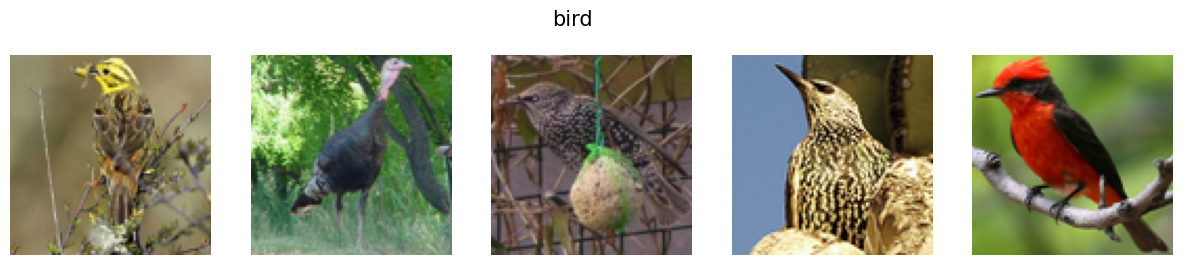

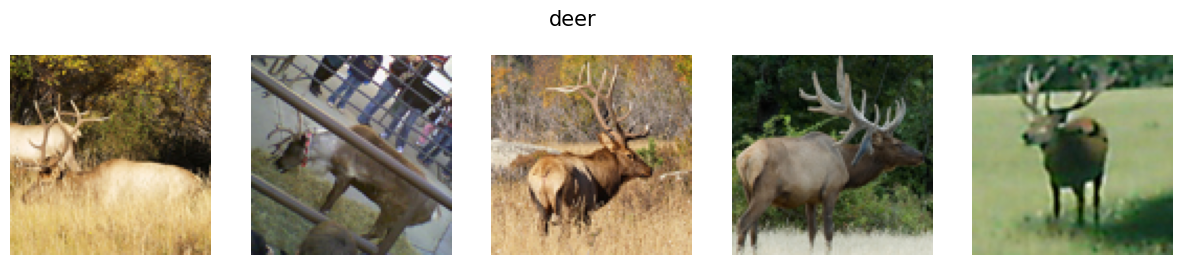

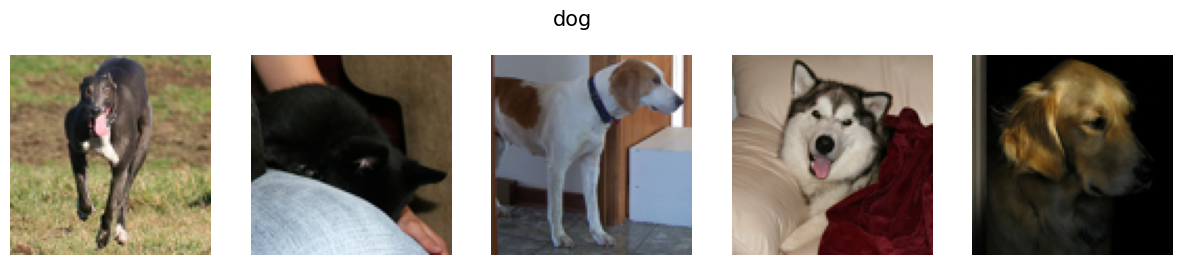

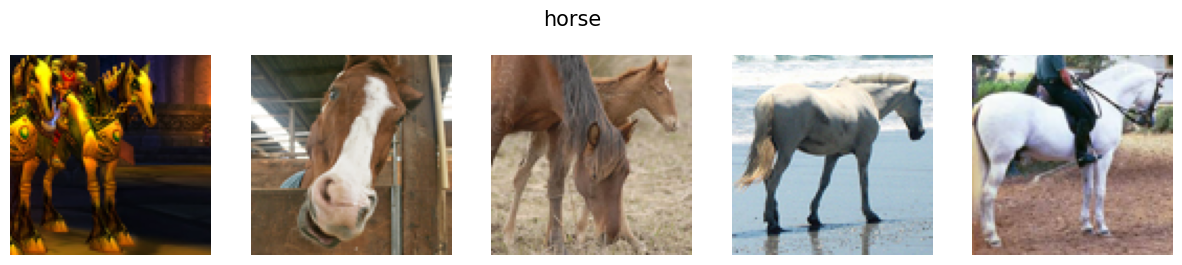

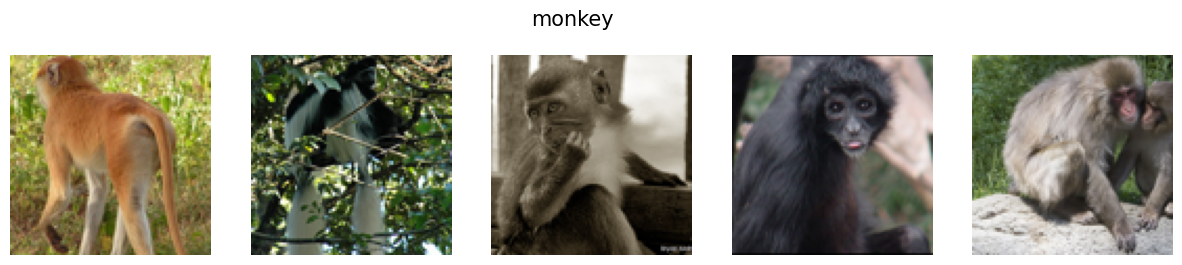

In [28]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [54]:
class STL10_loader(Dataset):
    def __init__(self, class_mapping, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            class_mapping (dict): Mapping of class indices to class names.
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''
        # Load STL10 dataset
        self.data = torchvision.datasets.STL10(
            root=root,
            split='train' if train else 'test',
            download=True
        )

        self.transform = transform
        self.class_mapping = class_mapping

        # Filter out only the classes specified in class_mapping
        self.filtered_data = [(img, label) for img, label in zip(self.data.data, self.data.labels)
                              if label in class_mapping.keys()]

    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''
        return len(self.filtered_data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''
        img, label = self.filtered_data[idx]
        img = Image.fromarray(np.transpose(img, (1, 2, 0)))

        if self.transform:
            img = self.transform(img)  # Apply any transformations (e.g., ToTensor)

        return img, label


<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [55]:


def load_stl10_data(batch_size=64):
    transform = transforms.Compose([
        transforms.Resize(32),  
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    train_set = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform)
    test_set = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform)
    return DataLoader(train_set, batch_size=batch_size, shuffle=True), DataLoader(test_set, batch_size=batch_size)

train_loader, test_loader = load_stl10_data()

Files already downloaded and verified
Files already downloaded and verified


In [91]:

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):  
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(3, 6, 5)
        self.s2 = nn.AvgPool2d(2)
        self.c3 = nn.Conv2d(6, 16, 5)
        self.s4 = nn.AvgPool2d(2)
        self.c5 = nn.Conv2d(16, 120, 5)
        self.f6 = nn.Linear(120, 84)
        self.out = nn.Linear(84, num_classes)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.Tanh(self.s2(self.c1(x)))
        x = self.Tanh(self.s4(self.c3(x)))
        x = self.Tanh(self.c5(x)).view(-1, 120)
        x = self.Tanh(self.f6(x))
        return self.out(x)

def train_finetune(model, loader, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        print('Epoch number: ', epoch)
        for inputs, labels in tqdm(loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(inputs), labels)
            loss.backward()
            optimizer.step()

def validate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

def curves(model, loader, optimizer, criterion, epochs=20):
    
    accuracy_data = []  
    loss_data = []      
    
    for epoch in range(epochs):
        model.train()
        print('Epoch number: ', epoch)
        running_loss = 0.0  
        total_correct, total_samples = 0, 0
        for inputs, labels in tqdm(loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)  
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        epoch_loss = running_loss / total_samples
        epoch_accuracy = 100 * total_correct / total_samples
        loss_data.append([epoch, epoch_loss])
        accuracy_data.append([epoch, epoch_accuracy])

    return accuracy_data, loss_data, model
    


In [88]:
# This code is purely meant to retrain the model
model = model_conv_1
for param in model.parameters(): param.requires_grad = False  
for param in model.f6.parameters(): param.requires_grad = True  
for param in model.out.parameters(): param.requires_grad = True

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=0.01)
criterion = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
train_finetune(model, train_loader,optimizer, criterion,30)
validate(model, test_loader)


Epoch number:  0


100%|██████████| 79/79 [00:02<00:00, 32.41it/s]


Epoch number:  1


100%|██████████| 79/79 [00:02<00:00, 33.38it/s]


Epoch number:  2


100%|██████████| 79/79 [00:02<00:00, 33.77it/s]


Epoch number:  3


100%|██████████| 79/79 [00:02<00:00, 32.73it/s]


Epoch number:  4


100%|██████████| 79/79 [00:02<00:00, 34.63it/s]


Epoch number:  5


100%|██████████| 79/79 [00:02<00:00, 34.40it/s]


Epoch number:  6


100%|██████████| 79/79 [00:02<00:00, 33.61it/s]


Epoch number:  7


100%|██████████| 79/79 [00:02<00:00, 34.90it/s]


Epoch number:  8


100%|██████████| 79/79 [00:02<00:00, 34.96it/s]


Epoch number:  9


100%|██████████| 79/79 [00:02<00:00, 35.00it/s]


Epoch number:  10


100%|██████████| 79/79 [00:02<00:00, 33.79it/s]


Epoch number:  11


100%|██████████| 79/79 [00:02<00:00, 32.44it/s]


Epoch number:  12


100%|██████████| 79/79 [00:02<00:00, 32.43it/s]


Epoch number:  13


100%|██████████| 79/79 [00:02<00:00, 32.87it/s]


Epoch number:  14


100%|██████████| 79/79 [00:02<00:00, 33.87it/s]


Epoch number:  15


100%|██████████| 79/79 [00:02<00:00, 34.80it/s]


Epoch number:  16


100%|██████████| 79/79 [00:02<00:00, 34.73it/s]


Epoch number:  17


100%|██████████| 79/79 [00:02<00:00, 35.27it/s]


Epoch number:  18


100%|██████████| 79/79 [00:02<00:00, 34.85it/s]


Epoch number:  19


100%|██████████| 79/79 [00:02<00:00, 33.99it/s]


Epoch number:  20


100%|██████████| 79/79 [00:02<00:00, 33.97it/s]


Epoch number:  21


100%|██████████| 79/79 [00:02<00:00, 34.62it/s]


Epoch number:  22


100%|██████████| 79/79 [00:02<00:00, 34.56it/s]


Epoch number:  23


100%|██████████| 79/79 [00:02<00:00, 34.97it/s]


Epoch number:  24


100%|██████████| 79/79 [00:02<00:00, 34.04it/s]


Epoch number:  25


100%|██████████| 79/79 [00:02<00:00, 34.31it/s]


Epoch number:  26


100%|██████████| 79/79 [00:02<00:00, 35.30it/s]


Epoch number:  27


100%|██████████| 79/79 [00:02<00:00, 34.90it/s]


Epoch number:  28


100%|██████████| 79/79 [00:02<00:00, 34.63it/s]


Epoch number:  29


100%|██████████| 79/79 [00:02<00:00, 35.11it/s]


Test Accuracy: 41.80%


In [94]:
# We use this code to make the learning curve data
epochs = 500
model = model_conv_1
for param in model.parameters(): param.requires_grad = False  
for param in model.f6.parameters(): param.requires_grad = True  
for param in model.out.parameters(): param.requires_grad = True
lr = 0.01
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr)
criterion = nn.CrossEntropyLoss()

data_acc, data_loss, model_modified = curves(model, train_loader,optimizer, criterion, epochs)


Epoch number:  0


100%|██████████| 79/79 [00:03<00:00, 22.09it/s]


Epoch number:  1


100%|██████████| 79/79 [00:03<00:00, 22.52it/s]


Epoch number:  2


100%|██████████| 79/79 [00:03<00:00, 22.28it/s]


Epoch number:  3


100%|██████████| 79/79 [00:03<00:00, 22.41it/s]


Epoch number:  4


100%|██████████| 79/79 [00:03<00:00, 22.11it/s]


Epoch number:  5


100%|██████████| 79/79 [00:03<00:00, 21.70it/s]


Epoch number:  6


100%|██████████| 79/79 [00:03<00:00, 22.38it/s]


Epoch number:  7


100%|██████████| 79/79 [00:03<00:00, 21.51it/s]


Epoch number:  8


100%|██████████| 79/79 [00:03<00:00, 21.15it/s]


Epoch number:  9


100%|██████████| 79/79 [00:03<00:00, 22.67it/s]


Epoch number:  10


100%|██████████| 79/79 [00:03<00:00, 22.66it/s]


Epoch number:  11


100%|██████████| 79/79 [00:03<00:00, 22.76it/s]


Epoch number:  12


100%|██████████| 79/79 [00:03<00:00, 22.63it/s]


Epoch number:  13


100%|██████████| 79/79 [00:03<00:00, 22.90it/s]


Epoch number:  14


100%|██████████| 79/79 [00:03<00:00, 23.00it/s]


Epoch number:  15


100%|██████████| 79/79 [00:03<00:00, 22.74it/s]


Epoch number:  16


100%|██████████| 79/79 [00:03<00:00, 22.83it/s]


Epoch number:  17


100%|██████████| 79/79 [00:03<00:00, 22.73it/s]


Epoch number:  18


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  19


100%|██████████| 79/79 [00:03<00:00, 22.88it/s]


Epoch number:  20


100%|██████████| 79/79 [00:03<00:00, 22.64it/s]


Epoch number:  21


100%|██████████| 79/79 [00:03<00:00, 22.88it/s]


Epoch number:  22


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  23


100%|██████████| 79/79 [00:03<00:00, 22.67it/s]


Epoch number:  24


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  25


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  26


100%|██████████| 79/79 [00:03<00:00, 22.90it/s]


Epoch number:  27


100%|██████████| 79/79 [00:03<00:00, 22.63it/s]


Epoch number:  28


100%|██████████| 79/79 [00:03<00:00, 22.87it/s]


Epoch number:  29


100%|██████████| 79/79 [00:03<00:00, 22.85it/s]


Epoch number:  30


100%|██████████| 79/79 [00:03<00:00, 22.81it/s]


Epoch number:  31


100%|██████████| 79/79 [00:03<00:00, 21.66it/s]


Epoch number:  32


100%|██████████| 79/79 [00:03<00:00, 21.19it/s]


Epoch number:  33


100%|██████████| 79/79 [00:03<00:00, 21.77it/s]


Epoch number:  34


100%|██████████| 79/79 [00:03<00:00, 21.65it/s]


Epoch number:  35


100%|██████████| 79/79 [00:03<00:00, 22.06it/s]


Epoch number:  36


100%|██████████| 79/79 [00:03<00:00, 22.12it/s]


Epoch number:  37


100%|██████████| 79/79 [00:03<00:00, 22.80it/s]


Epoch number:  38


100%|██████████| 79/79 [00:03<00:00, 22.71it/s]


Epoch number:  39


100%|██████████| 79/79 [00:03<00:00, 22.94it/s]


Epoch number:  40


100%|██████████| 79/79 [00:03<00:00, 22.90it/s]


Epoch number:  41


100%|██████████| 79/79 [00:03<00:00, 22.66it/s]


Epoch number:  42


100%|██████████| 79/79 [00:03<00:00, 22.86it/s]


Epoch number:  43


100%|██████████| 79/79 [00:03<00:00, 22.86it/s]


Epoch number:  44


100%|██████████| 79/79 [00:03<00:00, 22.66it/s]


Epoch number:  45


100%|██████████| 79/79 [00:03<00:00, 22.85it/s]


Epoch number:  46


100%|██████████| 79/79 [00:03<00:00, 22.89it/s]


Epoch number:  47


100%|██████████| 79/79 [00:03<00:00, 21.63it/s]


Epoch number:  48


100%|██████████| 79/79 [00:03<00:00, 22.59it/s]


Epoch number:  49


100%|██████████| 79/79 [00:03<00:00, 22.63it/s]


Epoch number:  50


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Epoch number:  51


100%|██████████| 79/79 [00:03<00:00, 22.79it/s]


Epoch number:  52


100%|██████████| 79/79 [00:03<00:00, 22.76it/s]


Epoch number:  53


100%|██████████| 79/79 [00:03<00:00, 22.65it/s]


Epoch number:  54


100%|██████████| 79/79 [00:03<00:00, 22.85it/s]


Epoch number:  55


100%|██████████| 79/79 [00:03<00:00, 21.07it/s]


Epoch number:  56


100%|██████████| 79/79 [00:03<00:00, 20.44it/s]


Epoch number:  57


100%|██████████| 79/79 [00:03<00:00, 22.44it/s]


Epoch number:  58


100%|██████████| 79/79 [00:03<00:00, 22.05it/s]


Epoch number:  59


100%|██████████| 79/79 [00:03<00:00, 22.70it/s]


Epoch number:  60


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  61


100%|██████████| 79/79 [00:03<00:00, 22.69it/s]


Epoch number:  62


100%|██████████| 79/79 [00:03<00:00, 22.81it/s]


Epoch number:  63


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  64


100%|██████████| 79/79 [00:03<00:00, 22.73it/s]


Epoch number:  65


100%|██████████| 79/79 [00:03<00:00, 22.96it/s]


Epoch number:  66


100%|██████████| 79/79 [00:03<00:00, 22.80it/s]


Epoch number:  67


100%|██████████| 79/79 [00:03<00:00, 22.11it/s]


Epoch number:  68


100%|██████████| 79/79 [00:03<00:00, 21.23it/s]


Epoch number:  69


100%|██████████| 79/79 [00:03<00:00, 21.58it/s]


Epoch number:  70


100%|██████████| 79/79 [00:03<00:00, 20.71it/s]


Epoch number:  71


100%|██████████| 79/79 [00:03<00:00, 22.04it/s]


Epoch number:  72


100%|██████████| 79/79 [00:03<00:00, 22.24it/s]


Epoch number:  73


100%|██████████| 79/79 [00:03<00:00, 22.46it/s]


Epoch number:  74


100%|██████████| 79/79 [00:03<00:00, 22.05it/s]


Epoch number:  75


100%|██████████| 79/79 [00:03<00:00, 22.27it/s]


Epoch number:  76


100%|██████████| 79/79 [00:03<00:00, 22.34it/s]


Epoch number:  77


100%|██████████| 79/79 [00:03<00:00, 21.26it/s]


Epoch number:  78


100%|██████████| 79/79 [00:04<00:00, 19.31it/s]


Epoch number:  79


100%|██████████| 79/79 [00:03<00:00, 20.85it/s]


Epoch number:  80


100%|██████████| 79/79 [00:03<00:00, 21.62it/s]


Epoch number:  81


100%|██████████| 79/79 [00:03<00:00, 20.89it/s]


Epoch number:  82


100%|██████████| 79/79 [00:03<00:00, 21.79it/s]


Epoch number:  83


100%|██████████| 79/79 [00:03<00:00, 21.82it/s]


Epoch number:  84


100%|██████████| 79/79 [00:03<00:00, 21.27it/s]


Epoch number:  85


100%|██████████| 79/79 [00:03<00:00, 21.94it/s]


Epoch number:  86


100%|██████████| 79/79 [00:03<00:00, 22.36it/s]


Epoch number:  87


100%|██████████| 79/79 [00:03<00:00, 22.45it/s]


Epoch number:  88


100%|██████████| 79/79 [00:03<00:00, 21.86it/s]


Epoch number:  89


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  90


100%|██████████| 79/79 [00:03<00:00, 23.49it/s]


Epoch number:  91


100%|██████████| 79/79 [00:03<00:00, 22.54it/s]


Epoch number:  92


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Epoch number:  93


100%|██████████| 79/79 [00:03<00:00, 23.08it/s]


Epoch number:  94


100%|██████████| 79/79 [00:03<00:00, 22.21it/s]


Epoch number:  95


100%|██████████| 79/79 [00:03<00:00, 22.57it/s]


Epoch number:  96


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  97


100%|██████████| 79/79 [00:03<00:00, 22.78it/s]


Epoch number:  98


100%|██████████| 79/79 [00:03<00:00, 23.59it/s]


Epoch number:  99


100%|██████████| 79/79 [00:03<00:00, 23.73it/s]


Epoch number:  100


100%|██████████| 79/79 [00:03<00:00, 23.25it/s]


Epoch number:  101


100%|██████████| 79/79 [00:03<00:00, 23.54it/s]


Epoch number:  102


100%|██████████| 79/79 [00:03<00:00, 22.72it/s]


Epoch number:  103


100%|██████████| 79/79 [00:03<00:00, 22.95it/s]


Epoch number:  104


100%|██████████| 79/79 [00:03<00:00, 22.41it/s]


Epoch number:  105


100%|██████████| 79/79 [00:03<00:00, 22.15it/s]


Epoch number:  106


100%|██████████| 79/79 [00:03<00:00, 22.70it/s]


Epoch number:  107


100%|██████████| 79/79 [00:03<00:00, 22.80it/s]


Epoch number:  108


100%|██████████| 79/79 [00:03<00:00, 21.53it/s]


Epoch number:  109


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  110


100%|██████████| 79/79 [00:03<00:00, 21.31it/s]


Epoch number:  111


100%|██████████| 79/79 [00:03<00:00, 22.21it/s]


Epoch number:  112


100%|██████████| 79/79 [00:03<00:00, 21.86it/s]


Epoch number:  113


100%|██████████| 79/79 [00:03<00:00, 22.76it/s]


Epoch number:  114


100%|██████████| 79/79 [00:03<00:00, 22.71it/s]


Epoch number:  115


100%|██████████| 79/79 [00:03<00:00, 22.35it/s]


Epoch number:  116


100%|██████████| 79/79 [00:03<00:00, 22.54it/s]


Epoch number:  117


100%|██████████| 79/79 [00:03<00:00, 22.61it/s]


Epoch number:  118


100%|██████████| 79/79 [00:03<00:00, 22.15it/s]


Epoch number:  119


100%|██████████| 79/79 [00:03<00:00, 22.49it/s]


Epoch number:  120


100%|██████████| 79/79 [00:03<00:00, 22.27it/s]


Epoch number:  121


100%|██████████| 79/79 [00:03<00:00, 22.59it/s]


Epoch number:  122


100%|██████████| 79/79 [00:03<00:00, 23.32it/s]


Epoch number:  123


100%|██████████| 79/79 [00:03<00:00, 22.81it/s]


Epoch number:  124


100%|██████████| 79/79 [00:03<00:00, 19.96it/s]


Epoch number:  125


100%|██████████| 79/79 [00:03<00:00, 21.84it/s]


Epoch number:  126


100%|██████████| 79/79 [00:03<00:00, 22.13it/s]


Epoch number:  127


100%|██████████| 79/79 [00:03<00:00, 22.34it/s]


Epoch number:  128


100%|██████████| 79/79 [00:03<00:00, 22.48it/s]


Epoch number:  129


100%|██████████| 79/79 [00:03<00:00, 21.62it/s]


Epoch number:  130


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  131


100%|██████████| 79/79 [00:03<00:00, 21.57it/s]


Epoch number:  132


100%|██████████| 79/79 [00:03<00:00, 22.30it/s]


Epoch number:  133


100%|██████████| 79/79 [00:03<00:00, 23.30it/s]


Epoch number:  134


100%|██████████| 79/79 [00:03<00:00, 23.39it/s]


Epoch number:  135


100%|██████████| 79/79 [00:03<00:00, 22.67it/s]


Epoch number:  136


100%|██████████| 79/79 [00:03<00:00, 21.21it/s]


Epoch number:  137


100%|██████████| 79/79 [00:03<00:00, 22.52it/s]


Epoch number:  138


100%|██████████| 79/79 [00:03<00:00, 22.52it/s]


Epoch number:  139


100%|██████████| 79/79 [00:03<00:00, 22.98it/s]


Epoch number:  140


100%|██████████| 79/79 [00:03<00:00, 22.79it/s]


Epoch number:  141


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  142


100%|██████████| 79/79 [00:03<00:00, 22.88it/s]


Epoch number:  143


100%|██████████| 79/79 [00:03<00:00, 21.52it/s]


Epoch number:  144


100%|██████████| 79/79 [00:03<00:00, 21.27it/s]


Epoch number:  145


100%|██████████| 79/79 [00:03<00:00, 22.53it/s]


Epoch number:  146


100%|██████████| 79/79 [00:03<00:00, 23.33it/s]


Epoch number:  147


100%|██████████| 79/79 [00:03<00:00, 22.04it/s]


Epoch number:  148


100%|██████████| 79/79 [00:03<00:00, 21.07it/s]


Epoch number:  149


100%|██████████| 79/79 [00:03<00:00, 22.25it/s]


Epoch number:  150


100%|██████████| 79/79 [00:03<00:00, 22.23it/s]


Epoch number:  151


100%|██████████| 79/79 [00:03<00:00, 22.18it/s]


Epoch number:  152


100%|██████████| 79/79 [00:03<00:00, 22.90it/s]


Epoch number:  153


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  154


100%|██████████| 79/79 [00:03<00:00, 23.45it/s]


Epoch number:  155


100%|██████████| 79/79 [00:03<00:00, 23.88it/s]


Epoch number:  156


100%|██████████| 79/79 [00:03<00:00, 23.80it/s]


Epoch number:  157


100%|██████████| 79/79 [00:03<00:00, 22.25it/s]


Epoch number:  158


100%|██████████| 79/79 [00:03<00:00, 23.08it/s]


Epoch number:  159


100%|██████████| 79/79 [00:03<00:00, 23.15it/s]


Epoch number:  160


100%|██████████| 79/79 [00:03<00:00, 23.08it/s]


Epoch number:  161


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  162


100%|██████████| 79/79 [00:03<00:00, 23.07it/s]


Epoch number:  163


100%|██████████| 79/79 [00:03<00:00, 23.20it/s]


Epoch number:  164


100%|██████████| 79/79 [00:03<00:00, 23.06it/s]


Epoch number:  165


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  166


100%|██████████| 79/79 [00:03<00:00, 23.28it/s]


Epoch number:  167


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  168


100%|██████████| 79/79 [00:03<00:00, 22.97it/s]


Epoch number:  169


100%|██████████| 79/79 [00:03<00:00, 23.17it/s]


Epoch number:  170


100%|██████████| 79/79 [00:03<00:00, 23.02it/s]


Epoch number:  171


100%|██████████| 79/79 [00:03<00:00, 23.24it/s]


Epoch number:  172


100%|██████████| 79/79 [00:03<00:00, 23.09it/s]


Epoch number:  173


100%|██████████| 79/79 [00:03<00:00, 23.05it/s]


Epoch number:  174


100%|██████████| 79/79 [00:03<00:00, 22.83it/s]


Epoch number:  175


100%|██████████| 79/79 [00:03<00:00, 20.85it/s]


Epoch number:  176


100%|██████████| 79/79 [00:03<00:00, 21.01it/s]


Epoch number:  177


100%|██████████| 79/79 [00:03<00:00, 21.14it/s]


Epoch number:  178


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  179


100%|██████████| 79/79 [00:03<00:00, 22.46it/s]


Epoch number:  180


100%|██████████| 79/79 [00:03<00:00, 22.68it/s]


Epoch number:  181


100%|██████████| 79/79 [00:03<00:00, 22.57it/s]


Epoch number:  182


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  183


100%|██████████| 79/79 [00:03<00:00, 23.16it/s]


Epoch number:  184


100%|██████████| 79/79 [00:03<00:00, 22.48it/s]


Epoch number:  185


100%|██████████| 79/79 [00:03<00:00, 22.86it/s]


Epoch number:  186


100%|██████████| 79/79 [00:03<00:00, 22.47it/s]


Epoch number:  187


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  188


100%|██████████| 79/79 [00:03<00:00, 22.68it/s]


Epoch number:  189


100%|██████████| 79/79 [00:03<00:00, 22.72it/s]


Epoch number:  190


100%|██████████| 79/79 [00:03<00:00, 22.38it/s]


Epoch number:  191


100%|██████████| 79/79 [00:03<00:00, 23.41it/s]


Epoch number:  192


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Epoch number:  193


100%|██████████| 79/79 [00:03<00:00, 21.55it/s]


Epoch number:  194


100%|██████████| 79/79 [00:03<00:00, 21.61it/s]


Epoch number:  195


100%|██████████| 79/79 [00:03<00:00, 21.87it/s]


Epoch number:  196


100%|██████████| 79/79 [00:03<00:00, 22.15it/s]


Epoch number:  197


100%|██████████| 79/79 [00:03<00:00, 23.24it/s]


Epoch number:  198


100%|██████████| 79/79 [00:03<00:00, 22.98it/s]


Epoch number:  199


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  200


100%|██████████| 79/79 [00:03<00:00, 22.65it/s]


Epoch number:  201


100%|██████████| 79/79 [00:03<00:00, 20.64it/s]


Epoch number:  202


100%|██████████| 79/79 [00:03<00:00, 21.56it/s]


Epoch number:  203


100%|██████████| 79/79 [00:03<00:00, 21.79it/s]


Epoch number:  204


100%|██████████| 79/79 [00:03<00:00, 22.42it/s]


Epoch number:  205


100%|██████████| 79/79 [00:03<00:00, 21.53it/s]


Epoch number:  206


100%|██████████| 79/79 [00:03<00:00, 21.64it/s]


Epoch number:  207


100%|██████████| 79/79 [00:03<00:00, 24.12it/s]


Epoch number:  208


100%|██████████| 79/79 [00:03<00:00, 23.64it/s]


Epoch number:  209


100%|██████████| 79/79 [00:03<00:00, 23.59it/s]


Epoch number:  210


100%|██████████| 79/79 [00:03<00:00, 23.52it/s]


Epoch number:  211


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch number:  212


100%|██████████| 79/79 [00:03<00:00, 23.53it/s]


Epoch number:  213


100%|██████████| 79/79 [00:03<00:00, 23.62it/s]


Epoch number:  214


100%|██████████| 79/79 [00:03<00:00, 23.00it/s]


Epoch number:  215


100%|██████████| 79/79 [00:03<00:00, 23.17it/s]


Epoch number:  216


100%|██████████| 79/79 [00:03<00:00, 23.95it/s]


Epoch number:  217


100%|██████████| 79/79 [00:03<00:00, 24.04it/s]


Epoch number:  218


100%|██████████| 79/79 [00:03<00:00, 22.76it/s]


Epoch number:  219


100%|██████████| 79/79 [00:03<00:00, 23.72it/s]


Epoch number:  220


100%|██████████| 79/79 [00:03<00:00, 23.92it/s]


Epoch number:  221


100%|██████████| 79/79 [00:03<00:00, 23.87it/s]


Epoch number:  222


100%|██████████| 79/79 [00:03<00:00, 23.96it/s]


Epoch number:  223


100%|██████████| 79/79 [00:03<00:00, 23.97it/s]


Epoch number:  224


100%|██████████| 79/79 [00:03<00:00, 23.88it/s]


Epoch number:  225


100%|██████████| 79/79 [00:03<00:00, 24.02it/s]


Epoch number:  226


100%|██████████| 79/79 [00:03<00:00, 23.89it/s]


Epoch number:  227


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  228


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  229


100%|██████████| 79/79 [00:03<00:00, 22.09it/s]


Epoch number:  230


100%|██████████| 79/79 [00:03<00:00, 23.58it/s]


Epoch number:  231


100%|██████████| 79/79 [00:03<00:00, 24.01it/s]


Epoch number:  232


100%|██████████| 79/79 [00:03<00:00, 23.78it/s]


Epoch number:  233


100%|██████████| 79/79 [00:03<00:00, 22.06it/s]


Epoch number:  234


100%|██████████| 79/79 [00:03<00:00, 22.46it/s]


Epoch number:  235


100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


Epoch number:  236


100%|██████████| 79/79 [00:03<00:00, 23.93it/s]


Epoch number:  237


100%|██████████| 79/79 [00:03<00:00, 23.86it/s]


Epoch number:  238


100%|██████████| 79/79 [00:03<00:00, 23.99it/s]


Epoch number:  239


100%|██████████| 79/79 [00:03<00:00, 23.91it/s]


Epoch number:  240


100%|██████████| 79/79 [00:03<00:00, 24.02it/s]


Epoch number:  241


100%|██████████| 79/79 [00:03<00:00, 23.97it/s]


Epoch number:  242


100%|██████████| 79/79 [00:03<00:00, 23.70it/s]


Epoch number:  243


100%|██████████| 79/79 [00:03<00:00, 23.17it/s]


Epoch number:  244


100%|██████████| 79/79 [00:03<00:00, 23.19it/s]


Epoch number:  245


100%|██████████| 79/79 [00:03<00:00, 23.85it/s]


Epoch number:  246


100%|██████████| 79/79 [00:03<00:00, 22.96it/s]


Epoch number:  247


100%|██████████| 79/79 [00:03<00:00, 23.70it/s]


Epoch number:  248


100%|██████████| 79/79 [00:03<00:00, 24.04it/s]


Epoch number:  249


100%|██████████| 79/79 [00:03<00:00, 24.04it/s]


Epoch number:  250


100%|██████████| 79/79 [00:03<00:00, 23.72it/s]


Epoch number:  251


100%|██████████| 79/79 [00:03<00:00, 23.84it/s]


Epoch number:  252


100%|██████████| 79/79 [00:03<00:00, 23.90it/s]


Epoch number:  253


100%|██████████| 79/79 [00:03<00:00, 24.01it/s]


Epoch number:  254


100%|██████████| 79/79 [00:03<00:00, 23.85it/s]


Epoch number:  255


100%|██████████| 79/79 [00:03<00:00, 23.94it/s]


Epoch number:  256


100%|██████████| 79/79 [00:03<00:00, 23.86it/s]


Epoch number:  257


100%|██████████| 79/79 [00:03<00:00, 23.62it/s]


Epoch number:  258


100%|██████████| 79/79 [00:03<00:00, 22.46it/s]


Epoch number:  259


100%|██████████| 79/79 [00:03<00:00, 22.96it/s]


Epoch number:  260


100%|██████████| 79/79 [00:03<00:00, 23.23it/s]


Epoch number:  261


100%|██████████| 79/79 [00:03<00:00, 23.95it/s]


Epoch number:  262


100%|██████████| 79/79 [00:03<00:00, 22.50it/s]


Epoch number:  263


100%|██████████| 79/79 [00:03<00:00, 22.14it/s]


Epoch number:  264


100%|██████████| 79/79 [00:03<00:00, 20.61it/s]


Epoch number:  265


100%|██████████| 79/79 [00:03<00:00, 21.60it/s]


Epoch number:  266


100%|██████████| 79/79 [00:03<00:00, 23.99it/s]


Epoch number:  267


100%|██████████| 79/79 [00:03<00:00, 23.84it/s]


Epoch number:  268


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  269


100%|██████████| 79/79 [00:03<00:00, 23.39it/s]


Epoch number:  270


100%|██████████| 79/79 [00:03<00:00, 23.46it/s]


Epoch number:  271


100%|██████████| 79/79 [00:03<00:00, 23.06it/s]


Epoch number:  272


100%|██████████| 79/79 [00:03<00:00, 23.08it/s]


Epoch number:  273


100%|██████████| 79/79 [00:03<00:00, 23.47it/s]


Epoch number:  274


100%|██████████| 79/79 [00:03<00:00, 23.45it/s]


Epoch number:  275


100%|██████████| 79/79 [00:03<00:00, 22.36it/s]


Epoch number:  276


100%|██████████| 79/79 [00:03<00:00, 21.85it/s]


Epoch number:  277


100%|██████████| 79/79 [00:03<00:00, 23.11it/s]


Epoch number:  278


100%|██████████| 79/79 [00:03<00:00, 22.49it/s]


Epoch number:  279


100%|██████████| 79/79 [00:03<00:00, 22.69it/s]


Epoch number:  280


100%|██████████| 79/79 [00:03<00:00, 22.97it/s]


Epoch number:  281


100%|██████████| 79/79 [00:03<00:00, 23.87it/s]


Epoch number:  282


100%|██████████| 79/79 [00:03<00:00, 23.92it/s]


Epoch number:  283


100%|██████████| 79/79 [00:03<00:00, 23.68it/s]


Epoch number:  284


100%|██████████| 79/79 [00:03<00:00, 23.24it/s]


Epoch number:  285


100%|██████████| 79/79 [00:03<00:00, 23.53it/s]


Epoch number:  286


100%|██████████| 79/79 [00:03<00:00, 23.48it/s]


Epoch number:  287


100%|██████████| 79/79 [00:03<00:00, 23.28it/s]


Epoch number:  288


100%|██████████| 79/79 [00:03<00:00, 23.93it/s]


Epoch number:  289


100%|██████████| 79/79 [00:03<00:00, 22.97it/s]


Epoch number:  290


100%|██████████| 79/79 [00:03<00:00, 23.05it/s]


Epoch number:  291


100%|██████████| 79/79 [00:03<00:00, 22.97it/s]


Epoch number:  292


100%|██████████| 79/79 [00:03<00:00, 22.10it/s]


Epoch number:  293


100%|██████████| 79/79 [00:03<00:00, 21.84it/s]


Epoch number:  294


100%|██████████| 79/79 [00:03<00:00, 21.71it/s]


Epoch number:  295


100%|██████████| 79/79 [00:03<00:00, 22.76it/s]


Epoch number:  296


100%|██████████| 79/79 [00:03<00:00, 22.94it/s]


Epoch number:  297


100%|██████████| 79/79 [00:03<00:00, 22.53it/s]


Epoch number:  298


100%|██████████| 79/79 [00:03<00:00, 23.13it/s]


Epoch number:  299


100%|██████████| 79/79 [00:03<00:00, 23.06it/s]


Epoch number:  300


100%|██████████| 79/79 [00:03<00:00, 23.56it/s]


Epoch number:  301


100%|██████████| 79/79 [00:03<00:00, 23.69it/s]


Epoch number:  302


100%|██████████| 79/79 [00:03<00:00, 22.89it/s]


Epoch number:  303


100%|██████████| 79/79 [00:03<00:00, 21.66it/s]


Epoch number:  304


100%|██████████| 79/79 [00:03<00:00, 22.37it/s]


Epoch number:  305


100%|██████████| 79/79 [00:03<00:00, 23.10it/s]


Epoch number:  306


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch number:  307


100%|██████████| 79/79 [00:03<00:00, 23.55it/s]


Epoch number:  308


100%|██████████| 79/79 [00:03<00:00, 23.70it/s]


Epoch number:  309


100%|██████████| 79/79 [00:03<00:00, 23.81it/s]


Epoch number:  310


100%|██████████| 79/79 [00:03<00:00, 23.36it/s]


Epoch number:  311


100%|██████████| 79/79 [00:03<00:00, 21.11it/s]


Epoch number:  312


100%|██████████| 79/79 [00:03<00:00, 22.05it/s]


Epoch number:  313


100%|██████████| 79/79 [00:03<00:00, 23.01it/s]


Epoch number:  314


100%|██████████| 79/79 [00:03<00:00, 21.68it/s]


Epoch number:  315


100%|██████████| 79/79 [00:03<00:00, 21.11it/s]


Epoch number:  316


100%|██████████| 79/79 [00:03<00:00, 21.16it/s]


Epoch number:  317


100%|██████████| 79/79 [00:03<00:00, 22.18it/s]


Epoch number:  318


100%|██████████| 79/79 [00:03<00:00, 22.87it/s]


Epoch number:  319


100%|██████████| 79/79 [00:03<00:00, 22.89it/s]


Epoch number:  320


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  321


100%|██████████| 79/79 [00:03<00:00, 23.04it/s]


Epoch number:  322


100%|██████████| 79/79 [00:03<00:00, 23.59it/s]


Epoch number:  323


100%|██████████| 79/79 [00:03<00:00, 23.55it/s]


Epoch number:  324


100%|██████████| 79/79 [00:03<00:00, 23.38it/s]


Epoch number:  325


100%|██████████| 79/79 [00:03<00:00, 22.94it/s]


Epoch number:  326


100%|██████████| 79/79 [00:03<00:00, 23.33it/s]


Epoch number:  327


100%|██████████| 79/79 [00:03<00:00, 23.80it/s]


Epoch number:  328


100%|██████████| 79/79 [00:03<00:00, 23.50it/s]


Epoch number:  329


100%|██████████| 79/79 [00:03<00:00, 22.99it/s]


Epoch number:  330


100%|██████████| 79/79 [00:03<00:00, 21.88it/s]


Epoch number:  331


100%|██████████| 79/79 [00:03<00:00, 23.05it/s]


Epoch number:  332


100%|██████████| 79/79 [00:03<00:00, 23.09it/s]


Epoch number:  333


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch number:  334


100%|██████████| 79/79 [00:03<00:00, 23.58it/s]


Epoch number:  335


100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


Epoch number:  336


100%|██████████| 79/79 [00:03<00:00, 24.13it/s]


Epoch number:  337


100%|██████████| 79/79 [00:03<00:00, 23.67it/s]


Epoch number:  338


100%|██████████| 79/79 [00:03<00:00, 24.02it/s]


Epoch number:  339


100%|██████████| 79/79 [00:03<00:00, 23.94it/s]


Epoch number:  340


100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


Epoch number:  341


100%|██████████| 79/79 [00:03<00:00, 23.96it/s]


Epoch number:  342


100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


Epoch number:  343


100%|██████████| 79/79 [00:03<00:00, 23.87it/s]


Epoch number:  344


100%|██████████| 79/79 [00:03<00:00, 23.72it/s]


Epoch number:  345


100%|██████████| 79/79 [00:03<00:00, 24.02it/s]


Epoch number:  346


100%|██████████| 79/79 [00:03<00:00, 24.08it/s]


Epoch number:  347


100%|██████████| 79/79 [00:03<00:00, 23.88it/s]


Epoch number:  348


100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


Epoch number:  349


100%|██████████| 79/79 [00:03<00:00, 23.93it/s]


Epoch number:  350


100%|██████████| 79/79 [00:03<00:00, 23.91it/s]


Epoch number:  351


100%|██████████| 79/79 [00:03<00:00, 23.97it/s]


Epoch number:  352


100%|██████████| 79/79 [00:03<00:00, 22.73it/s]


Epoch number:  353


100%|██████████| 79/79 [00:03<00:00, 23.06it/s]


Epoch number:  354


100%|██████████| 79/79 [00:03<00:00, 23.04it/s]


Epoch number:  355


100%|██████████| 79/79 [00:03<00:00, 22.60it/s]


Epoch number:  356


100%|██████████| 79/79 [00:03<00:00, 22.83it/s]


Epoch number:  357


100%|██████████| 79/79 [00:03<00:00, 23.75it/s]


Epoch number:  358


100%|██████████| 79/79 [00:03<00:00, 23.49it/s]


Epoch number:  359


100%|██████████| 79/79 [00:03<00:00, 23.45it/s]


Epoch number:  360


100%|██████████| 79/79 [00:03<00:00, 23.01it/s]


Epoch number:  361


100%|██████████| 79/79 [00:03<00:00, 22.49it/s]


Epoch number:  362


100%|██████████| 79/79 [00:03<00:00, 23.33it/s]


Epoch number:  363


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch number:  364


100%|██████████| 79/79 [00:03<00:00, 22.90it/s]


Epoch number:  365


100%|██████████| 79/79 [00:03<00:00, 22.92it/s]


Epoch number:  366


100%|██████████| 79/79 [00:03<00:00, 23.86it/s]


Epoch number:  367


100%|██████████| 79/79 [00:03<00:00, 23.83it/s]


Epoch number:  368


100%|██████████| 79/79 [00:03<00:00, 23.93it/s]


Epoch number:  369


100%|██████████| 79/79 [00:03<00:00, 23.99it/s]


Epoch number:  370


100%|██████████| 79/79 [00:03<00:00, 23.66it/s]


Epoch number:  371


100%|██████████| 79/79 [00:03<00:00, 22.03it/s]


Epoch number:  372


100%|██████████| 79/79 [00:03<00:00, 22.06it/s]


Epoch number:  373


100%|██████████| 79/79 [00:03<00:00, 22.70it/s]


Epoch number:  374


100%|██████████| 79/79 [00:03<00:00, 22.44it/s]


Epoch number:  375


100%|██████████| 79/79 [00:03<00:00, 22.08it/s]


Epoch number:  376


100%|██████████| 79/79 [00:03<00:00, 21.85it/s]


Epoch number:  377


100%|██████████| 79/79 [00:03<00:00, 23.04it/s]


Epoch number:  378


100%|██████████| 79/79 [00:03<00:00, 23.29it/s]


Epoch number:  379


100%|██████████| 79/79 [00:03<00:00, 23.20it/s]


Epoch number:  380


100%|██████████| 79/79 [00:03<00:00, 22.70it/s]


Epoch number:  381


100%|██████████| 79/79 [00:03<00:00, 21.96it/s]


Epoch number:  382


100%|██████████| 79/79 [00:03<00:00, 22.37it/s]


Epoch number:  383


100%|██████████| 79/79 [00:03<00:00, 22.29it/s]


Epoch number:  384


100%|██████████| 79/79 [00:03<00:00, 22.36it/s]


Epoch number:  385


100%|██████████| 79/79 [00:03<00:00, 22.06it/s]


Epoch number:  386


100%|██████████| 79/79 [00:03<00:00, 22.24it/s]


Epoch number:  387


100%|██████████| 79/79 [00:03<00:00, 22.52it/s]


Epoch number:  388


100%|██████████| 79/79 [00:03<00:00, 22.93it/s]


Epoch number:  389


100%|██████████| 79/79 [00:03<00:00, 21.67it/s]


Epoch number:  390


100%|██████████| 79/79 [00:03<00:00, 22.61it/s]


Epoch number:  391


100%|██████████| 79/79 [00:03<00:00, 22.68it/s]


Epoch number:  392


100%|██████████| 79/79 [00:03<00:00, 23.18it/s]


Epoch number:  393


100%|██████████| 79/79 [00:03<00:00, 22.86it/s]


Epoch number:  394


100%|██████████| 79/79 [00:03<00:00, 22.78it/s]


Epoch number:  395


100%|██████████| 79/79 [00:03<00:00, 22.23it/s]


Epoch number:  396


100%|██████████| 79/79 [00:03<00:00, 23.08it/s]


Epoch number:  397


100%|██████████| 79/79 [00:03<00:00, 22.83it/s]


Epoch number:  398


100%|██████████| 79/79 [00:03<00:00, 23.02it/s]


Epoch number:  399


100%|██████████| 79/79 [00:03<00:00, 22.69it/s]


Epoch number:  400


100%|██████████| 79/79 [00:03<00:00, 23.23it/s]


Epoch number:  401


100%|██████████| 79/79 [00:03<00:00, 23.35it/s]


Epoch number:  402


100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch number:  403


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  404


100%|██████████| 79/79 [00:03<00:00, 22.85it/s]


Epoch number:  405


100%|██████████| 79/79 [00:03<00:00, 22.14it/s]


Epoch number:  406


100%|██████████| 79/79 [00:03<00:00, 22.53it/s]


Epoch number:  407


100%|██████████| 79/79 [00:03<00:00, 22.91it/s]


Epoch number:  408


100%|██████████| 79/79 [00:03<00:00, 22.33it/s]


Epoch number:  409


100%|██████████| 79/79 [00:03<00:00, 22.43it/s]


Epoch number:  410


100%|██████████| 79/79 [00:03<00:00, 22.29it/s]


Epoch number:  411


100%|██████████| 79/79 [00:03<00:00, 22.58it/s]


Epoch number:  412


100%|██████████| 79/79 [00:03<00:00, 22.61it/s]


Epoch number:  413


100%|██████████| 79/79 [00:03<00:00, 22.96it/s]


Epoch number:  414


100%|██████████| 79/79 [00:03<00:00, 23.12it/s]


Epoch number:  415


100%|██████████| 79/79 [00:03<00:00, 23.15it/s]


Epoch number:  416


100%|██████████| 79/79 [00:03<00:00, 23.07it/s]


Epoch number:  417


100%|██████████| 79/79 [00:03<00:00, 23.22it/s]


Epoch number:  418


100%|██████████| 79/79 [00:03<00:00, 23.10it/s]


Epoch number:  419


100%|██████████| 79/79 [00:03<00:00, 23.50it/s]


Epoch number:  420


100%|██████████| 79/79 [00:03<00:00, 23.37it/s]


Epoch number:  421


100%|██████████| 79/79 [00:03<00:00, 23.54it/s]


Epoch number:  422


100%|██████████| 79/79 [00:03<00:00, 23.79it/s]


Epoch number:  423


100%|██████████| 79/79 [00:03<00:00, 23.51it/s]


Epoch number:  424


100%|██████████| 79/79 [00:03<00:00, 23.67it/s]


Epoch number:  425


100%|██████████| 79/79 [00:03<00:00, 23.68it/s]


Epoch number:  426


100%|██████████| 79/79 [00:03<00:00, 23.19it/s]


Epoch number:  427


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch number:  428


100%|██████████| 79/79 [00:03<00:00, 22.75it/s]


Epoch number:  429


100%|██████████| 79/79 [00:03<00:00, 22.94it/s]


Epoch number:  430


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  431


100%|██████████| 79/79 [00:03<00:00, 22.97it/s]


Epoch number:  432


100%|██████████| 79/79 [00:03<00:00, 23.25it/s]


Epoch number:  433


100%|██████████| 79/79 [00:03<00:00, 22.73it/s]


Epoch number:  434


100%|██████████| 79/79 [00:03<00:00, 22.61it/s]


Epoch number:  435


100%|██████████| 79/79 [00:03<00:00, 22.50it/s]


Epoch number:  436


100%|██████████| 79/79 [00:03<00:00, 22.85it/s]


Epoch number:  437


100%|██████████| 79/79 [00:03<00:00, 23.30it/s]


Epoch number:  438


100%|██████████| 79/79 [00:03<00:00, 23.22it/s]


Epoch number:  439


100%|██████████| 79/79 [00:03<00:00, 22.07it/s]


Epoch number:  440


100%|██████████| 79/79 [00:03<00:00, 22.20it/s]


Epoch number:  441


100%|██████████| 79/79 [00:03<00:00, 22.98it/s]


Epoch number:  442


100%|██████████| 79/79 [00:03<00:00, 23.17it/s]


Epoch number:  443


100%|██████████| 79/79 [00:03<00:00, 23.52it/s]


Epoch number:  444


100%|██████████| 79/79 [00:03<00:00, 23.03it/s]


Epoch number:  445


100%|██████████| 79/79 [00:03<00:00, 22.14it/s]


Epoch number:  446


100%|██████████| 79/79 [00:03<00:00, 23.38it/s]


Epoch number:  447


100%|██████████| 79/79 [00:03<00:00, 22.92it/s]


Epoch number:  448


100%|██████████| 79/79 [00:03<00:00, 23.29it/s]


Epoch number:  449


100%|██████████| 79/79 [00:03<00:00, 23.32it/s]


Epoch number:  450


100%|██████████| 79/79 [00:03<00:00, 23.34it/s]


Epoch number:  451


100%|██████████| 79/79 [00:03<00:00, 23.28it/s]


Epoch number:  452


100%|██████████| 79/79 [00:03<00:00, 23.50it/s]


Epoch number:  453


100%|██████████| 79/79 [00:03<00:00, 23.51it/s]


Epoch number:  454


100%|██████████| 79/79 [00:03<00:00, 23.43it/s]


Epoch number:  455


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Epoch number:  456


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  457


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  458


100%|██████████| 79/79 [00:03<00:00, 22.81it/s]


Epoch number:  459


100%|██████████| 79/79 [00:03<00:00, 22.89it/s]


Epoch number:  460


100%|██████████| 79/79 [00:03<00:00, 23.00it/s]


Epoch number:  461


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  462


100%|██████████| 79/79 [00:03<00:00, 23.41it/s]


Epoch number:  463


100%|██████████| 79/79 [00:03<00:00, 23.53it/s]


Epoch number:  464


100%|██████████| 79/79 [00:03<00:00, 23.56it/s]


Epoch number:  465


100%|██████████| 79/79 [00:03<00:00, 23.76it/s]


Epoch number:  466


100%|██████████| 79/79 [00:03<00:00, 23.80it/s]


Epoch number:  467


100%|██████████| 79/79 [00:03<00:00, 23.48it/s]


Epoch number:  468


100%|██████████| 79/79 [00:03<00:00, 23.78it/s]


Epoch number:  469


100%|██████████| 79/79 [00:03<00:00, 23.78it/s]


Epoch number:  470


100%|██████████| 79/79 [00:03<00:00, 23.60it/s]


Epoch number:  471


100%|██████████| 79/79 [00:03<00:00, 23.78it/s]


Epoch number:  472


100%|██████████| 79/79 [00:03<00:00, 23.53it/s]


Epoch number:  473


100%|██████████| 79/79 [00:03<00:00, 23.20it/s]


Epoch number:  474


100%|██████████| 79/79 [00:03<00:00, 23.15it/s]


Epoch number:  475


100%|██████████| 79/79 [00:03<00:00, 23.51it/s]


Epoch number:  476


100%|██████████| 79/79 [00:03<00:00, 23.42it/s]


Epoch number:  477


100%|██████████| 79/79 [00:03<00:00, 23.52it/s]


Epoch number:  478


100%|██████████| 79/79 [00:03<00:00, 23.67it/s]


Epoch number:  479


100%|██████████| 79/79 [00:03<00:00, 23.46it/s]


Epoch number:  480


100%|██████████| 79/79 [00:03<00:00, 22.95it/s]


Epoch number:  481


100%|██████████| 79/79 [00:03<00:00, 22.33it/s]


Epoch number:  482


100%|██████████| 79/79 [00:03<00:00, 22.84it/s]


Epoch number:  483


100%|██████████| 79/79 [00:03<00:00, 22.94it/s]


Epoch number:  484


100%|██████████| 79/79 [00:03<00:00, 22.74it/s]


Epoch number:  485


100%|██████████| 79/79 [00:03<00:00, 22.82it/s]


Epoch number:  486


100%|██████████| 79/79 [00:03<00:00, 23.06it/s]


Epoch number:  487


100%|██████████| 79/79 [00:03<00:00, 23.02it/s]


Epoch number:  488


100%|██████████| 79/79 [00:03<00:00, 23.00it/s]


Epoch number:  489


100%|██████████| 79/79 [00:03<00:00, 23.12it/s]


Epoch number:  490


100%|██████████| 79/79 [00:03<00:00, 23.15it/s]


Epoch number:  491


100%|██████████| 79/79 [00:03<00:00, 22.80it/s]


Epoch number:  492


100%|██████████| 79/79 [00:03<00:00, 22.18it/s]


Epoch number:  493


100%|██████████| 79/79 [00:03<00:00, 22.99it/s]


Epoch number:  494


100%|██████████| 79/79 [00:03<00:00, 23.13it/s]


Epoch number:  495


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Epoch number:  496


100%|██████████| 79/79 [00:03<00:00, 22.58it/s]


Epoch number:  497


100%|██████████| 79/79 [00:03<00:00, 22.00it/s]


Epoch number:  498


100%|██████████| 79/79 [00:03<00:00, 22.44it/s]


Epoch number:  499


100%|██████████| 79/79 [00:03<00:00, 22.77it/s]


Text(0.5, 1.0, 'Learning Curve')

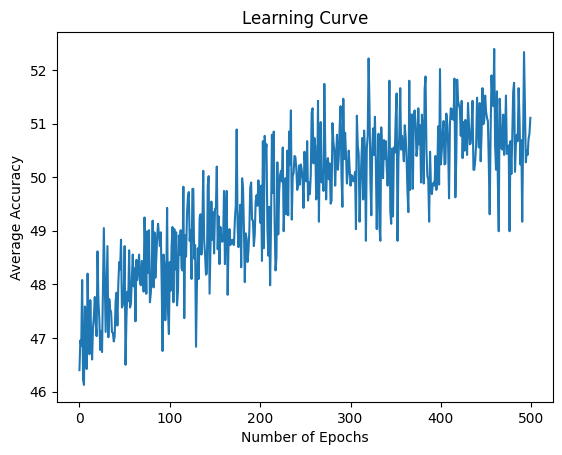

In [95]:
# This code is used for plotting

def average_by_group(data):
    sums_and_counts = {}  
    for i, acc in data:
        if i not in sums_and_counts:
            sums_and_counts[i] = [0, 0]  
        sums_and_counts[i][0] += acc  
        sums_and_counts[i][1] += 1  

    
    averages = []
    for i in sorted(sums_and_counts): 
        total_sum, count = sums_and_counts[i]
        averages.append(total_sum / count)  

    return averages

plt.plot(average_by_group(data_acc))
plt.xlabel('Number of Epochs')
plt.ylabel('Average Accuracy')
plt.title('Learning Curve')


In [ ]:
plt.plot(average_by_group(data_loss))
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.title('Loss curve')

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [22]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % 33| - % 33| - % 33|
|  | - % 33| - % 33| - % 33|
|  | - % 33| - % 33| - % 33|
|  | - % 33| - % 33| - % 33|

### - End of Notebook -